In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Load dataset
df = pd.read_csv('diamonds.csv')

In [26]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [27]:
# Drop unnecessary column
df = df.drop(columns=['Unnamed: 0'])

In [28]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

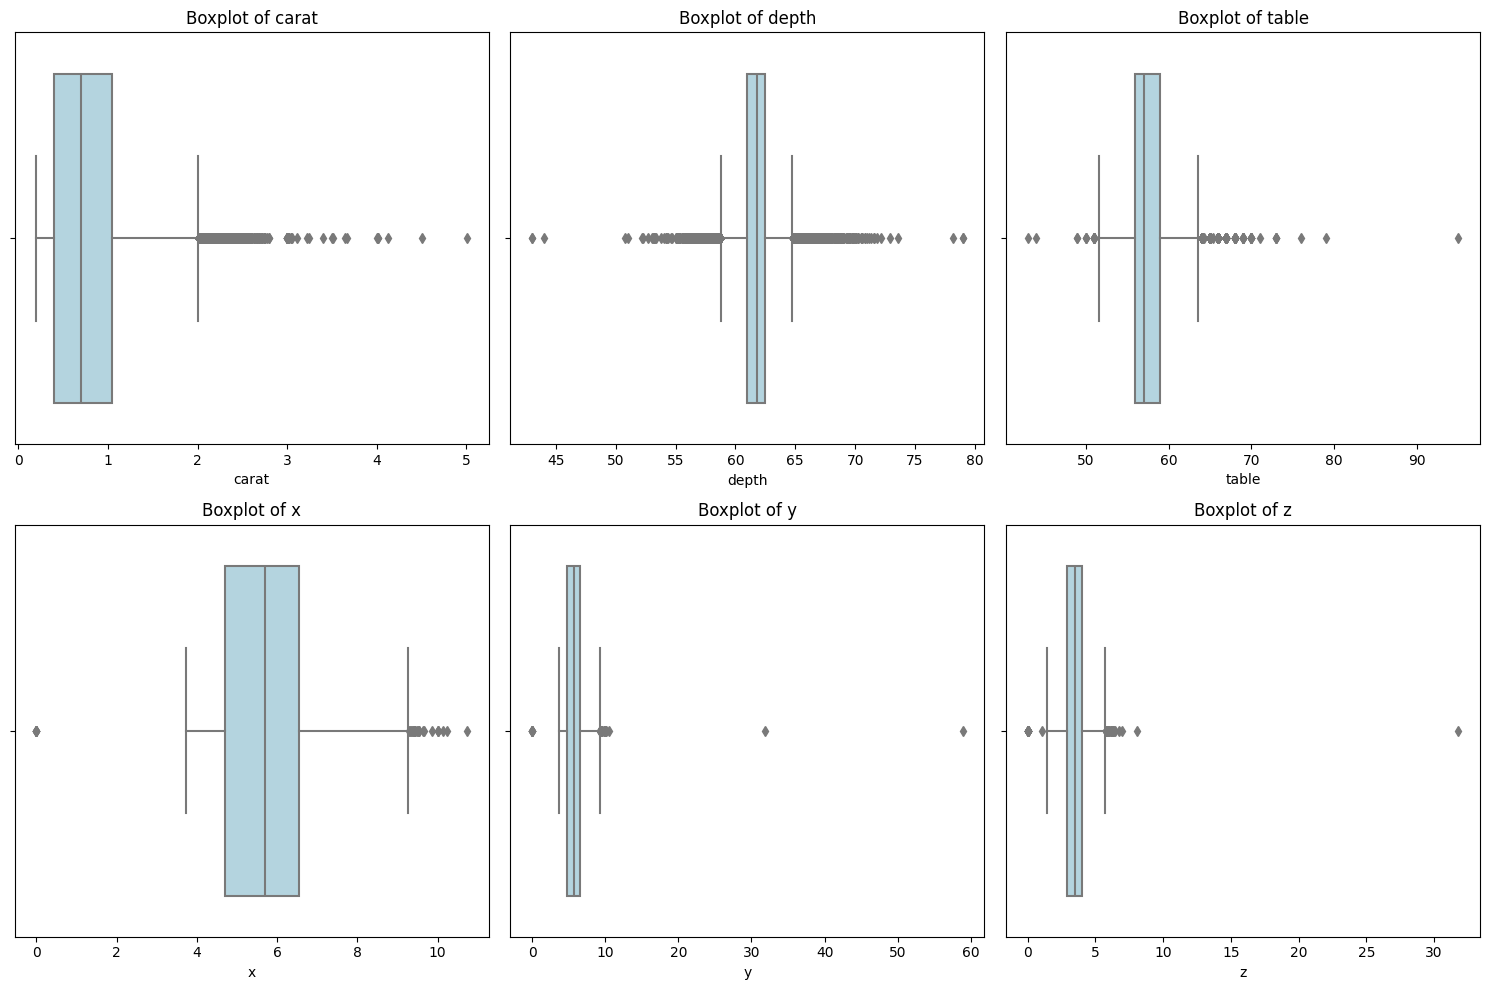

In [29]:
# List of numerical columns (excluding target 'price' if desired)
numerical_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Plot boxplots to detect outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [30]:
# Remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

In [31]:
numerical_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']
df = remove_outliers_iqr(df, numerical_cols)

In [32]:
# Summary statistics for numerical features
numerical_summary = df.describe().T[['mean', '50%', 'std']]
numerical_summary.rename(columns={'50%': 'median', 'std': 'std_dev'}, inplace=True)

# Add variance manually
numerical_summary['variance'] = df[numerical_summary.index].var()

print(numerical_summary)

              mean   median      std_dev      variance
carat     0.739428     0.70     0.401140  1.609137e-01
depth    61.800055    61.90     1.078445  1.163043e+00
table    57.252957    57.00     2.011106  4.044547e+00
price  3511.064849  2208.50  3431.762256  1.177699e+07
x         5.612654     5.61     1.027376  1.055502e+00
y         5.617466     5.60     1.021666  1.043802e+00
z         3.469932     3.46     0.635423  4.037626e-01


C:\Users\91870\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91870\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91870\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91870\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

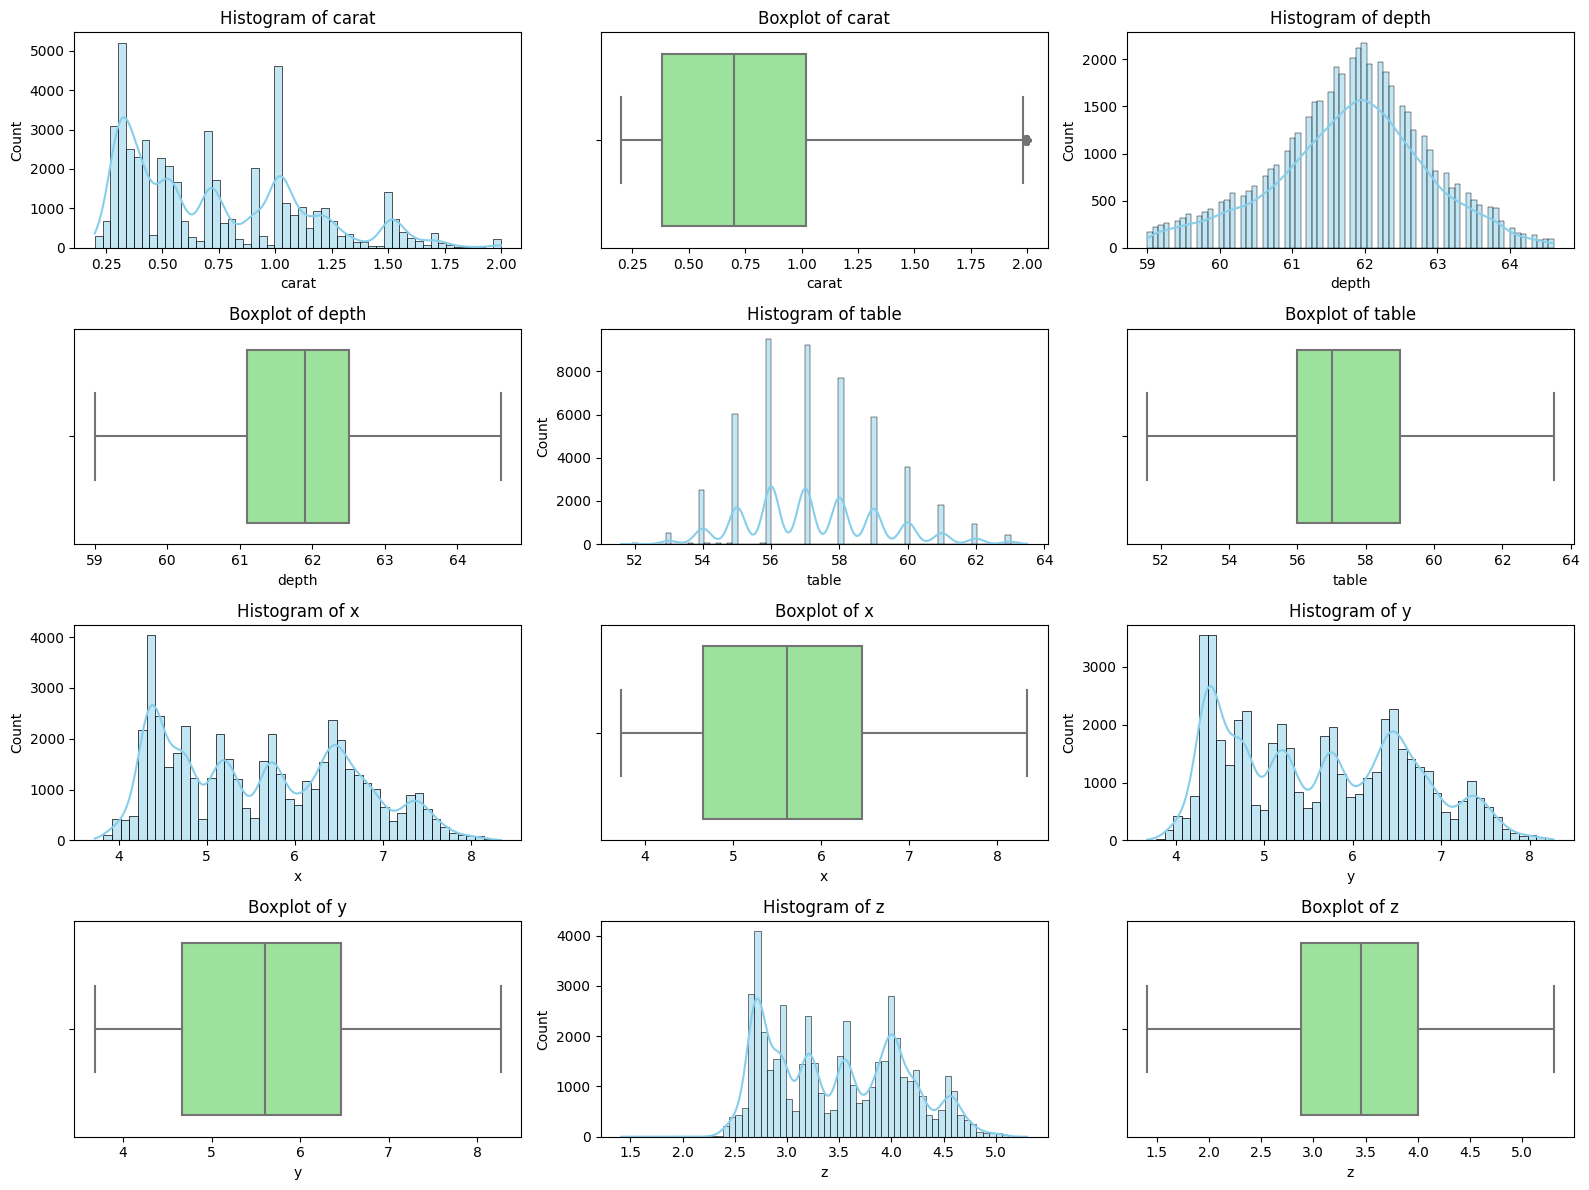

In [33]:
numerical_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Plot histograms and boxplots
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols):
    # Histogram
    plt.subplot(4, 3, 2*i + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(4, 3, 2*i + 2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

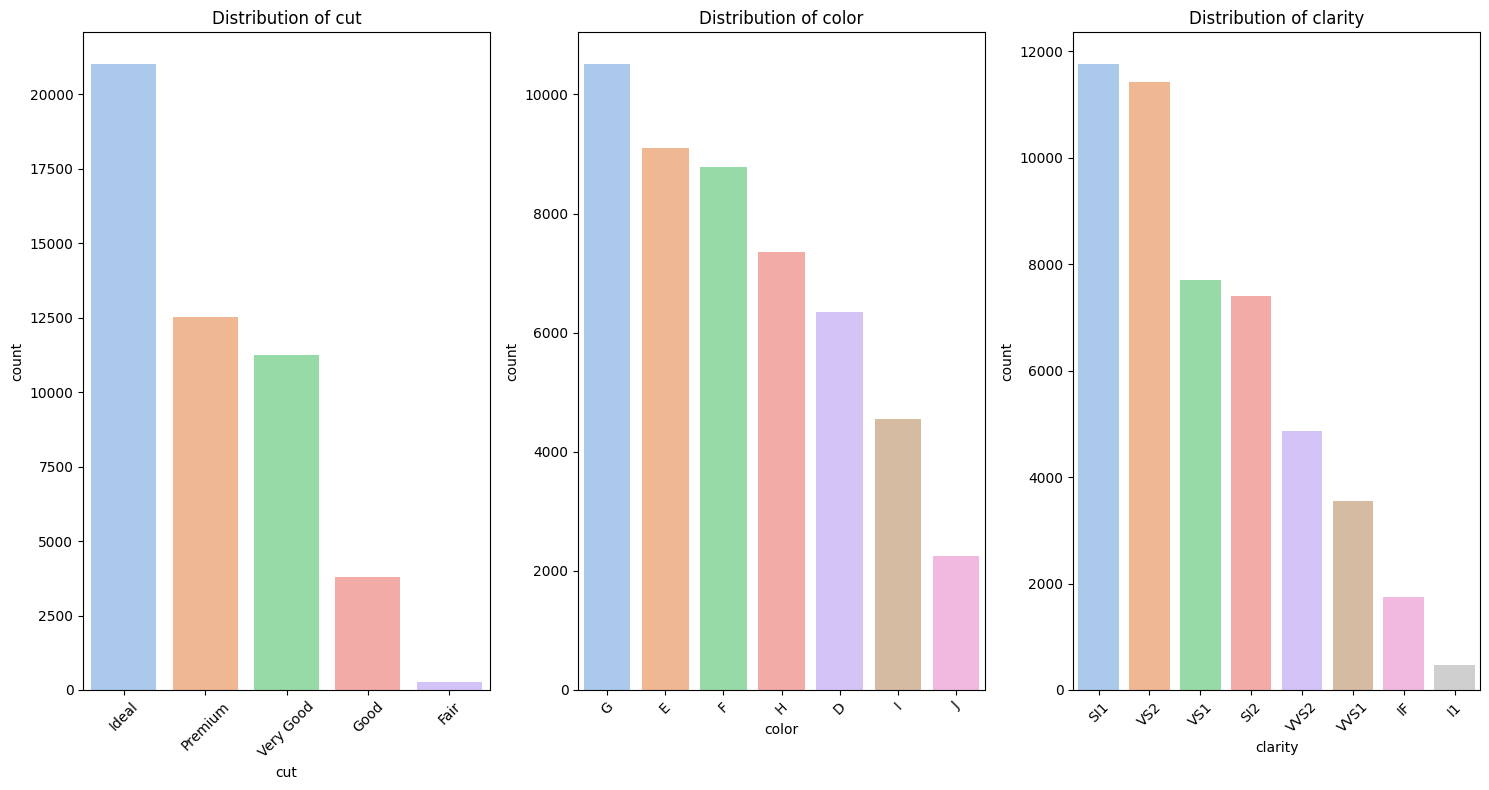

In [34]:
categorical_cols = ['cut', 'color', 'clarity']

# Bar charts for categorical features
plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=df[col], palette='pastel', order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

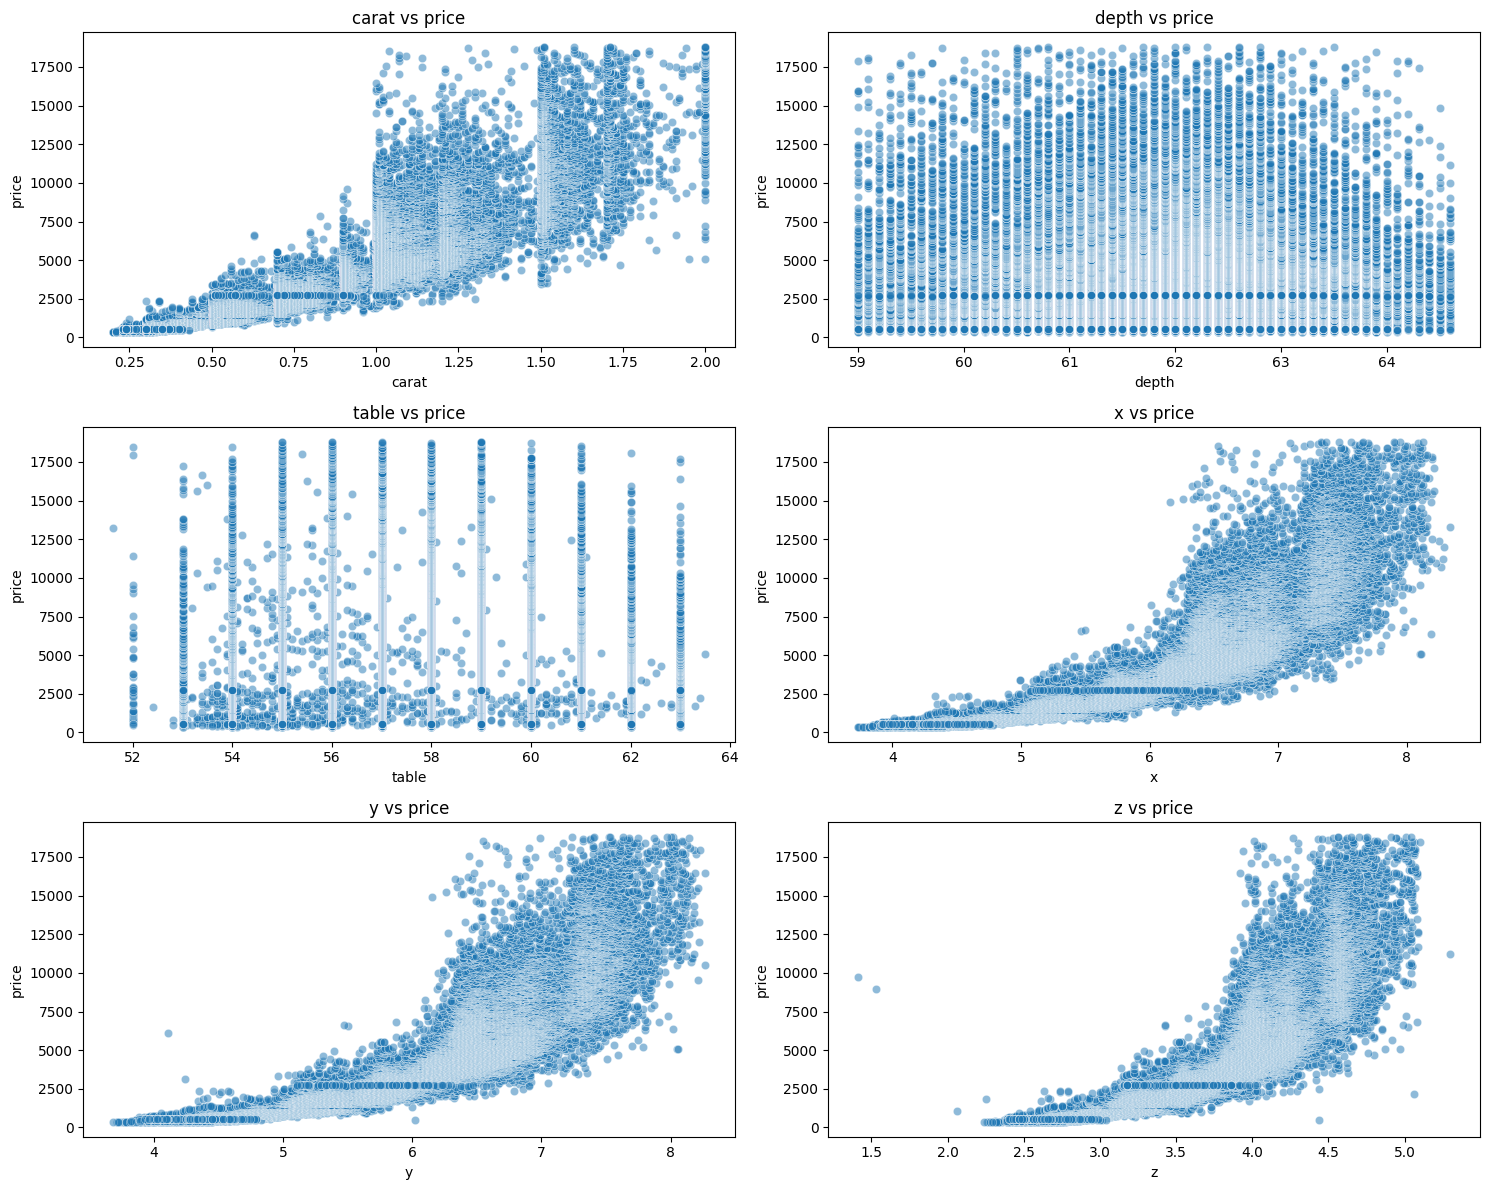

In [35]:
# Scatter plots for numerical relationships
numerical_pairs = [('carat', 'price'), ('depth', 'price'), ('table', 'price'), ('x', 'price'), ('y', 'price'), ('z', 'price')]

plt.figure(figsize=(15, 12))
for i, (x_col, y_col) in enumerate(numerical_pairs):
    plt.subplot(3, 2, i + 1)
    sns.scatterplot(data=df, x=x_col, y=y_col, alpha=0.5)
    plt.title(f'{x_col} vs {y_col}')
plt.tight_layout()
plt.show()

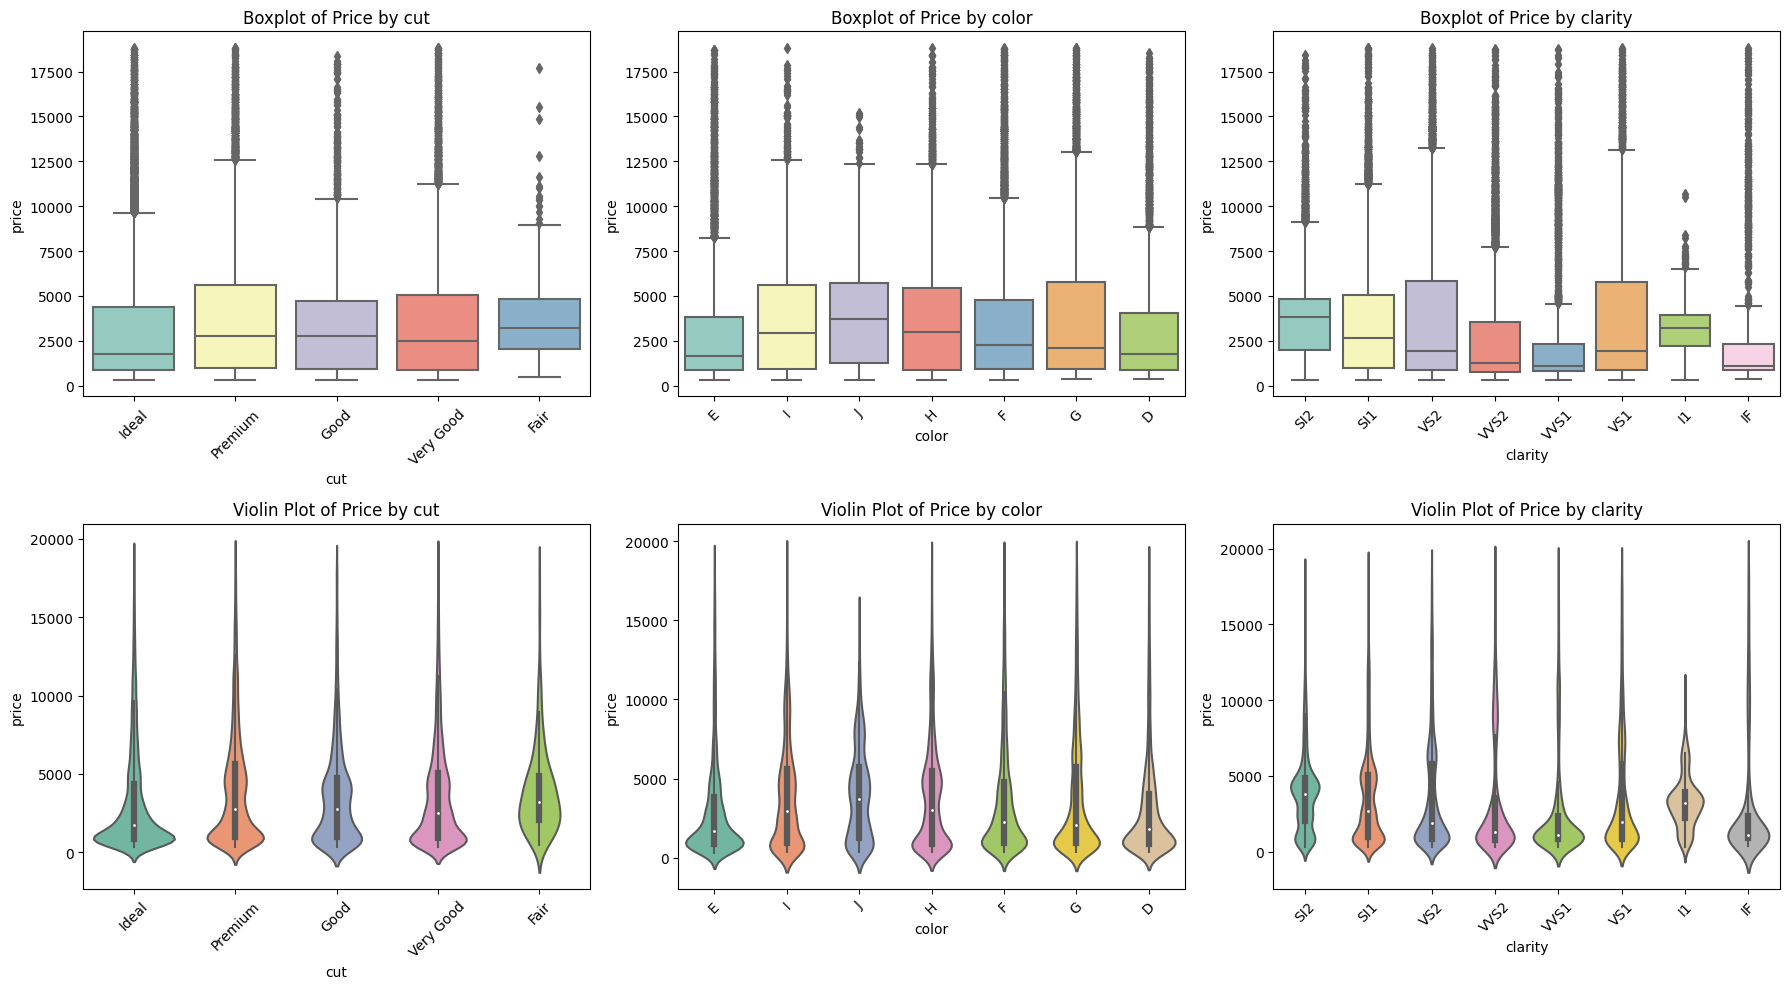

In [36]:
categorical_cols = ['cut', 'color', 'clarity']

# Box plots for categorical vs price
plt.figure(figsize=(18, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x=col, y='price', palette='Set3')
    plt.title(f'Boxplot of Price by {col}')
    plt.xticks(rotation=45)

# Violin plots for categorical vs price
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 4)
    sns.violinplot(data=df, x=col, y='price', palette='Set2')
    plt.title(f'Violin Plot of Price by {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

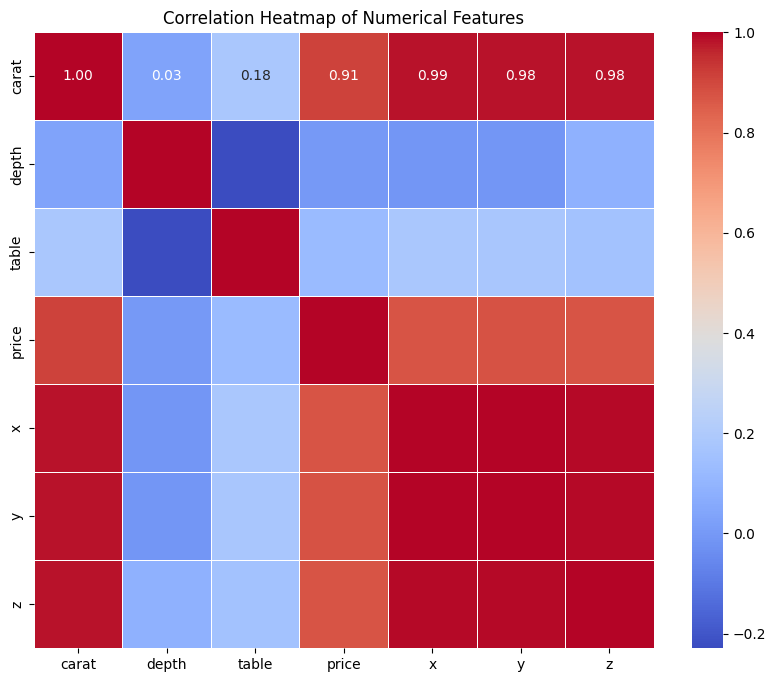

In [37]:
# Correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [38]:
# Encode categorical features
le = LabelEncoder()
for col in ['cut', 'color', 'clarity']:
    df[col] = le.fit_transform(df[col])

In [40]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['cut', 'color', 'clarity'], drop_first=True)

In [41]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Scale numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [42]:


# 80:20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Instantiate model
rf = RandomForestRegressor(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           scoring='r2',
                           verbose=1)

# Train the model with grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation R² Score:", best_score)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation R² Score: 0.9736217245485227
